#Describamos nuestra base de datos


## Información de los datos


instant:

  - Es el índice del registro. Básicamente, es un número que nos dice cuántos registros llevamos en la base de datos. 🗂️

dteday:

  - Es la fecha exacta del registro. Esto nos sirve para analizar tendencias a lo largo del tiempo, como patrones diarios, mensuales o anuales. 📅

season:

  - Representa la estación del año en formato numérico:

      1: Primavera 🌸
      2: Verano ☀️
      3: Otoño 🍁
      4: Invierno ❄️

  - Ideal para ver si el uso de las bicicletas cambia con el clima.

yr:

  - Año del registro:

      0: 2011
      1: 2012

  - Nos permite observar cambios entre años. Quizá se detecte un aumento en el uso de las bicicletas de un año a otro. 📈

mnth:

  - Mes del año (1 a 12). Nos ayuda a identificar patrones mensuales y ajustar modelos según la época del año. 🗓️

hr:

  - Hora del día (0 a 23). Fundamental para detectar horarios pico o momentos de baja demanda. ⏰

holiday:

  - Indica si el día es festivo (1) o no (0). Esto afecta los patrones de uso, ya que los días festivos suelen tener menos desplazamientos laborales. 🎉

weekday:

  - Día de la semana (0 a 6, donde 0 es domingo). Útil para analizar diferencias entre días laborales y fines de semana. 🖥️ vs 🛌

workingday:

  - Es un día laboral (1) o no (0). Aquí se excluyen fines de semana y festivos. Esto es clave para analizar el uso habitual frente a días de descanso. 🚴‍♂️

weathersit:

  - Describe el estado del clima, y tiene estas categorías:

      1: Despejado o parcialmente nublado 🌤️
      2: Neblina o nublado 🌥️
      3: Lluvia ligera o nieve 🌧️
      4: Lluvia intensa o nieve fuerte 🌩️

  - Aquí podremos ver si la gente prefiere quedarse en casa cuando el clima está feo.

temp:

  - Temperatura normalizada (entre -8°C y 39°C). Indica qué tan caliente o frío estaba el día. ❄️🔥

atemp:

  - Sensación térmica normalizada (entre -16°C y 50°C). Es como la temperatura "real", considerando factores como humedad o viento. 🥶🥵

hum:

  - Humedad relativa normalizada (entre 0 y 1). Una alta humedad podría desincentivar el uso de las bicicletas. 💧

windspeed:

  - Velocidad del viento normalizada (entre 0 y 1). Mucho viento también puede reducir el uso de bicis. 💨

casual:

  - Cuenta de usuarios ocasionales, es decir, aquellos que no están registrados pero alquilaron una bicicleta. 🚶‍♂️

registered:

  - Cuenta de usuarios registrados que alquilaron bicicletas. Esto puede indicar usuarios frecuentes. 🧑‍💻

cnt:

  - Es el total de bicicletas alquiladas, sumando usuarios casuales y registrados. Esta es nuestra variable objetivo si queremos predecir el uso total. 🚴‍♀️

##Analisís de la base de datos


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('day.csv')

In [ ]:
# 1. Inspección inicial
print("Primeras filas del conjunto de datos:")
print(data.head())

Primeras filas del conjunto de datos:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562 

En esta primera linea de codigo revisamos los primeros 5 datos que tenemos en cada una de las columnas y como cada una de ellas concuerda con lo explicado en la información de nuestra base de datos

In [ ]:
print("\nInformación general del conjunto de datos:")
print(data.info())


Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


1. Tamaño de los datos:

  La base tiene 731 registros (filas) y 16 columnas. Esto indica que estamos trabajando con un conjunto de datos moderado que debería procesarse sin problemas con herramientas estándar como pandas.
2. Tipos de datos:

  Enteros (int64): Hay 11 columnas enteras, que incluyen variables categóricas (como season, yr, mnth) y contadores (como casual, registered, cnt).
  Flotantes (float64): 4 columnas contienen valores continuos (temp, atemp, hum, windspeed), ideales para análisis y modelos predictivos.
  Cadenas (object): Solo una columna (dteday), que es la fecha. Posiblemente necesitemos convertirla a un tipo de dato de fecha (datetime) para análisis temporal.
3. Datos completos:

  Todas las columnas tienen 731 valores no nulos, lo que significa que no hay datos faltantes. Esto es genial porque no necesitamos lidiar con imputaciones o eliminación de registros. 🎉



In [ ]:
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   

1. season:

  Varía de 1 (primavera) a 4 (invierno). Las estaciones están bien distribuidas, con una media cercana a 2.5. Esto sugiere que hay registros de todas las estaciones.
2. yr:

  Solo tiene dos valores, 0 (2011) y 1 (2012), con una media cercana a 0.5. Esto confirma que los datos abarcan ambos años de manera equilibrada.

3. mnth:

  Va de 1 (enero) a 12 (diciembre), representando todos los meses del año.

4. holiday y workingday:

  holiday: Solo un 2.87% de los días son feriados (media de 0.0287), lo cual es esperable.

5. workingday:

  Cerca del 68.4% de los días son laborales, lo que refleja un calendario típico.

6. weathersit:

  Principalmente valores de 1 (clima despejado o parcialmente nublado) con una media de 1.39. Valores de 3 (lluvia o nieve ligera) aparecen ocasionalmente, pero no hay valores de 4 (clima severo).

## Graficos

In [ ]:
# 2. Visualización de distribuciones y correlaciones
# Configuración de estilo
sns.set_theme(style="whitegrid")

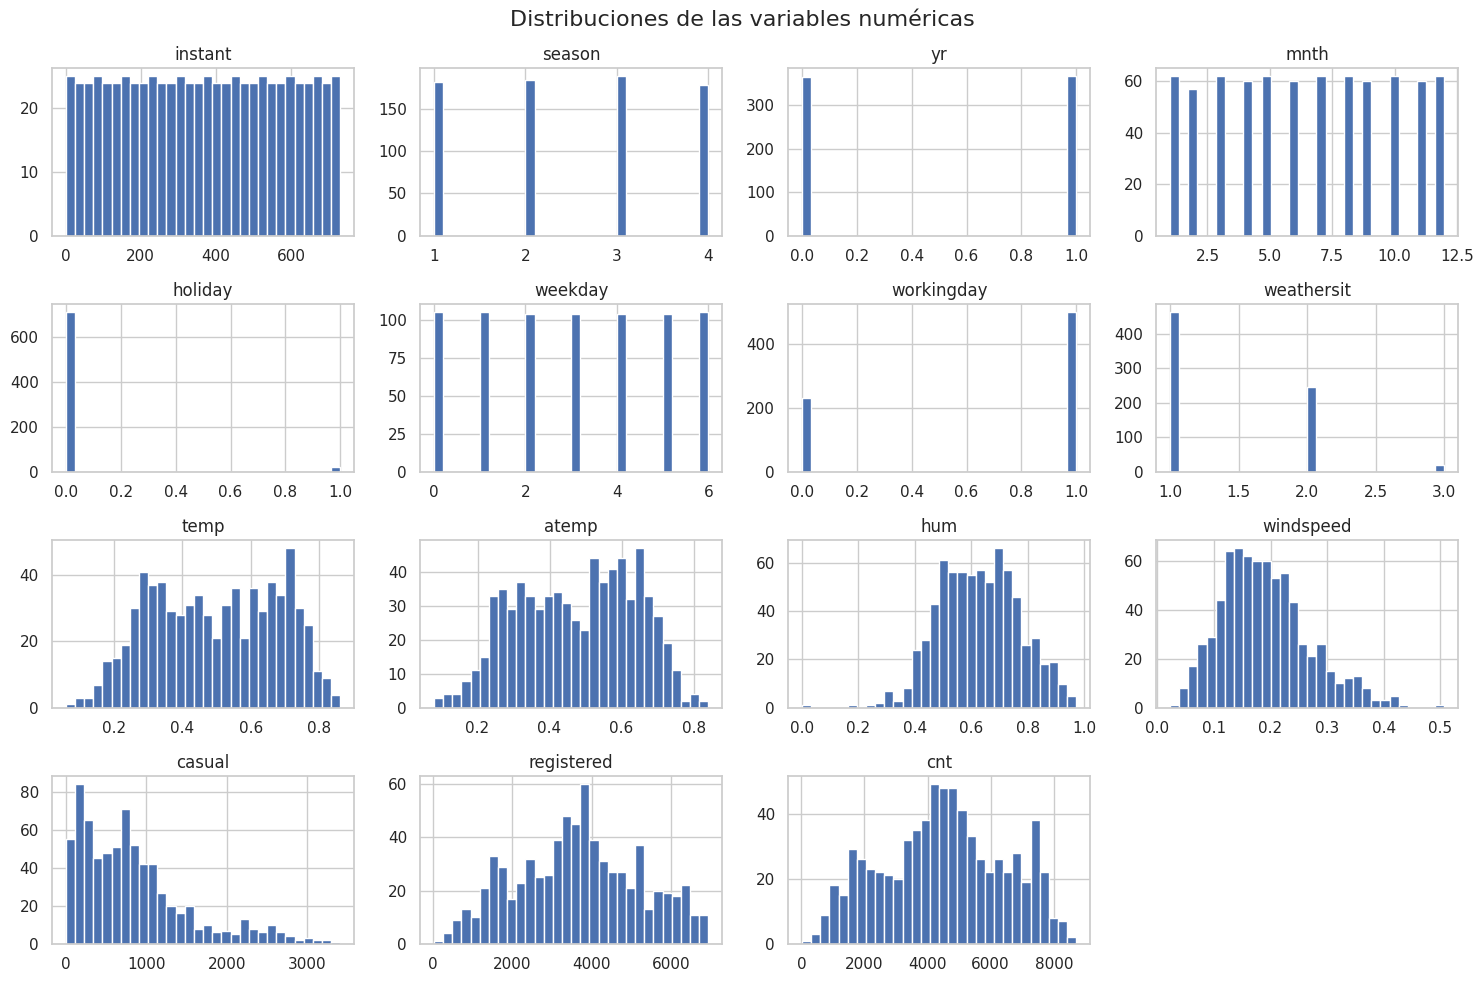

In [ ]:
# Distribuciones de las variables numéricas
data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribuciones de las variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

Vamos a hablar sobre las distribuciones que mas nos ofrecen información(temp y atemp, hum, windspeed, casual, registered, cnt).

Los datos que nos vamos a saltar seran (instant: ya que solo es un indice, Yr: sabemos que es una columna balanceada por y al medir dos años sabemos perfectamente que mostraria misma cantidad de datos)

para las graficas faltantes eran valores que ya podiamos predecir por el analisis anterior

(Holiday: hay un porcentaje bajo de días festidos por lo cual su distribución tiende a ser 0, Weekday: maneja una normalización y una forma constante probablemente mencione un habito o rutina de los usuarios registrados en la plataforma, Working Day: teniendo en cuenta que los días laborales son entre semana es normal ver que los usuarios con habito de compartir la bicicleta tiendan a usarla en días laborales, Weathersit: donde hay mas usuarios es en climas despejados y no se registran usuarios en climas extremos).


### Analisis de los graficos con mayor información

1. temp y atemp (Temperatura y Sensación Térmica):

  Ambas tienen una distribución bastante uniforme, con valores concentrados entre 0.3 y 0.7. Esto indica que la mayoría de los días tienen temperaturas moderadas, y las temperaturas extremas (muy frías o muy cálidas) son menos frecuentes.

  Las similitudes entre temp y atemp confirman que la sensación térmica está altamente correlacionada con la temperatura real.

2. hum (Humedad):

  Distribución sesgada hacia la derecha, con la mayoría de los valores entre 0.5 y 0.8.

  Los días con baja humedad (< 0.3) son muy pocos, lo que sugiere que el clima en general tiende a ser húmedo.

  Esta variable probablemente influye en el comportamiento de los usuarios, especialmente en días con valores extremos de humedad.

3. windspeed (Velocidad del Viento):

  Distribución sesgada hacia la izquierda, con la mayoría de los valores entre 0.1 y 0.3.
  
  Pocos días tienen velocidades de viento altas (> 0.4), lo que sugiere que las condiciones de viento severo son raras.

4. casual (Usuarios No Registrados):

  Distribución claramente sesgada hacia la izquierda, con un gran número de días con pocos usuarios casuales (< 1000).

  Los picos en valores más altos (~2000-3000) pueden corresponder a días especiales, como fines de semana o días con buen clima.

  La alta variabilidad sugiere que el uso casual es muy sensible a factores externos como clima, feriados, y eventos.

5. registered (Usuarios Registrados):

  Distribución más balanceada en forma de campana, con un pico alrededor de 4000 usuarios registrados.
  Esto indica que el uso por parte de usuarios registrados es más constante y menos afectado por factores externos.
  La regularidad sugiere que estos usuarios podrían ser trabajadores o personas con hábitos establecidos.

6. cnt (Total de Usuarios):

  La distribución es similar a la de registered, lo que tiene sentido ya que los usuarios registrados dominan la mayoría de los días.
  Un pico en torno a 4000-5000 usuarios, con valores extremos más dispersos hacia arriba, probablemente debido a eventos o días con condiciones ideales para andar en bicicleta.


### Puntos claves


1. Patrones consistentes y extremos:

  Variables como temp, atemp, y windspeed muestran distribuciones más uniformes, mientras que casual tiene una alta dispersión, lo que indica un comportamiento impredecible en comparación con registered.

2. Condiciones ideales para usuarios casuales:

  Los usuarios casuales probablemente aprovechan días específicos con condiciones climáticas favorables.

2. Impacto del clima:

  hum y windspeed podrían tener un impacto notable en los alquileres de bicicletas, especialmente para los usuarios casuales.


### Grafico de correlación


Nota: Con el fin de poder usar la grafica de correlación para identificar el motivo de la dispersión en usuarios ocasionales vamos a cambiar el dato dteday por el tipo de datos que necesitamos que es el datatime

In [ ]:
# Convertir 'dteday' a formato datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Guardar los cambios en un nuevo archivo CSV
data.to_csv('day_updated.csv', index=False)

print("Archivo actualizado guardado como 'day_updated.csv'")



Archivo actualizado guardado como 'day_updated.csv'


In [ ]:
# Verificar si hay columnas no numéricas
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Columnas no numéricas:", non_numeric_columns)



Columnas no numéricas: Index(['dteday'], dtype='object')


In [ ]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data2 = pd.read_csv('day_updated.csv')

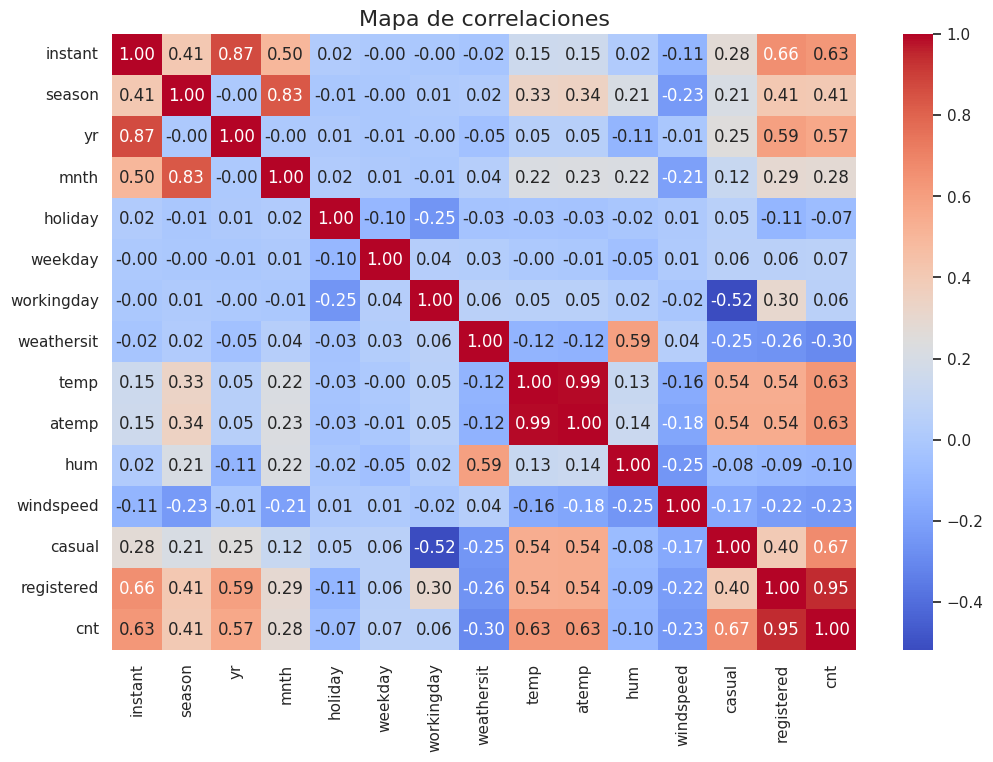

In [ ]:
# Filtrar las columnas numéricas
data_numeric = data2.select_dtypes(include=['int64', 'float64'])

# Crear el mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlaciones", fontsize=16)
plt.show()

Lo mas importante y lo que queriamos verificar es la correlación de usuarios con casuales con el workday, donde es una correlación fuerte negativa, significando que es poco probable que un usuario no registrado use la bicicleta en un día de trabajo.

tambien tenemos que:

1. Correlación con el Clima:

  Weathersit: Existe una correlación negativa con casual, lo que indica que los usuarios casuales son menos propensos a alquilar bicicletas en condiciones meteorológicas adversas (como lluvia intensa o nieve).

2. Correlación con la Temperatura:

  Temp y Atemp: Hay una correlación positiva con casual, lo que sugiere que una mayor temperatura y sensación térmica favorecen el alquiler de bicicletas por parte de usuarios casuales. Esto tiene sentido porque las personas tienden a disfrutar más de actividades al aire libre en climas cálidos.

3. Correlación con el Tiempo:

  Días de la Semana (weekday) y Días Laborables (workingday): Los usuarios casuales tienden a alquilar bicicletas más en fines de semana y días festivos relación positiva con weekdays,tanto así, que podemos ver una correlación negativa con workingday.


# Limpieza de datos

Para iniciar una buena limpieza de datos tenemos que rectificar que debemos realizar, por ejemplo, la base de datos selecionada ya tiene datos normalizados, por lo cual si hay datos que no lo esten, el modelo tendra diferencia de datos muy sesgados y esto afectara al momento de encontrar patrones

In [ ]:
data2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


1. Identificación de datos no normalizados
Si bien mencionas que la base tiene datos normalizados, es importante verificarlo para asegurarnos de que no haya columnas o registros con valores fuera de escala.

Acción: Revisa los valores mínimos y máximos de las columnas numéricas para confirmar que están en el rango esperado (por ejemplo, de 0 a 1 en este caso).

In [ ]:
print(data2.describe().T[['min', 'max']])

                  min          max
instant      1.000000   731.000000
season       1.000000     4.000000
yr           0.000000     1.000000
mnth         1.000000    12.000000
holiday      0.000000     1.000000
weekday      0.000000     6.000000
workingday   0.000000     1.000000
weathersit   1.000000     3.000000
temp         0.059130     0.861667
atemp        0.079070     0.840896
hum          0.000000     0.972500
windspeed    0.022392     0.507463
casual       2.000000  3410.000000
registered  20.000000  6946.000000
cnt         22.000000  8714.000000


En este análisis podemos observar algunos puntos clave que deben abordarse para mejorar la preparación de los datos y garantizar un mejor rendimiento del modelo:

1. Variables no normalizadas:
Los valores de las columnas casual y registered no se encuentran normalizados. Dado que estamos trabajando con un modelo que requiere datos en rangos similares para identificar patrones, es necesario normalizar estas variables.

2. Eliminación de columnas irrelevantes:
La columna instant todavía está presente en el conjunto de datos. Dado que se trata de un índice y no aporta información relevante para la predicción, debemos eliminarla para evitar que el modelo identifique patrones erróneos o absurdos.

3. Codificación de variables categóricas:
Las columnas categóricas como season, mnth, weekday y weathersit contienen valores numéricos que podrían ser malinterpretados por el modelo como prioridades jerárquicas. Para evitar esto, aplicaremos la función get_dummies, lo que convertirá estas columnas en variables binarias (0 y 1). De este modo, prevenimos que el modelo le asigne un peso mayor a estas variables debido a sus valores numéricos más altos, especialmente porque normalizaremos todo el conjunto de datos.

Creemos una copia llamada data3 para manejar buenas practicas del codigo

In [ ]:
# Crear una copia del conjunto de datos
data3 = data2.copy()

##Eliminación del indice

In [ ]:
# Eliminar la columna 'instant'
data3 = data3.drop(columns=['instant'])

In [ ]:
data3.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##Normalización de variable

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar 'casual' y 'registered'
scaler = MinMaxScaler()
data3[['casual', 'registered']] = scaler.fit_transform(data3[['casual', 'registered']])

In [ ]:
data3.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0.096538,0.091539,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0.037852,0.093849,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,0.034624,0.174560,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,0.031103,0.207046,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,0.023474,0.216286,1600


##Codificación de variables categoricas (dummies)

In [ ]:
# Codificar variables categóricas
data3 = pd.get_dummies(data3, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        731 non-null    object 
 1   yr            731 non-null    int64  
 2   holiday       731 non-null    int64  
 3   workingday    731 non-null    int64  
 4   temp          731 non-null    float64
 5   atemp         731 non-null    float64
 6   hum           731 non-null    float64
 7   windspeed     731 non-null    float64
 8   casual        731 non-null    float64
 9   registered    731 non-null    float64
 10  cnt           731 non-null    int64  
 11  season_2      731 non-null    bool   
 12  season_3      731 non-null    bool   
 13  season_4      731 non-null    bool   
 14  mnth_2        731 non-null    bool   
 15  mnth_3        731 non-null    bool   
 16  mnth_4        731 non-null    bool   
 17  mnth_5        731 non-null    bool   
 18  mnth_6        731 non-null    

In [ ]:
# Seleccionar columnas que son de tipo bool (ya codificadas como True/False)
binary_columns = [col for col in data3.columns if data3[col].dtype == 'bool']

# Convertir las columnas binarias al tipo int (0 y 1)
data3[binary_columns] = data3[binary_columns].astype(int)

# Verificar el resultado
print(data3[binary_columns].head())


   season_2  season_3  season_4  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  \
0         0         0         0       0       0       0       0       0   
1         0         0         0       0       0       0       0       0   
2         0         0         0       0       0       0       0       0   
3         0         0         0       0       0       0       0       0   
4         0         0         0       0       0       0       0       0   

   mnth_7  mnth_8  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0       0       0  ...        0        0          0          0          0   
1       0       0  ...        0        0          0          0          0   
2       0       0  ...        0        0          1          0          0   
3       0       0  ...        0        0          0          1          0   
4       0       0  ...        0        0          0          0          1   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0         

In [ ]:
data3.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,2011-01-01,0,0,0,0.344167,0.363625,0.805833,0.160446,0.096538,0.091539,...,0,0,0,0,0,0,0,1,1,0
1,2011-01-02,0,0,0,0.363478,0.353739,0.696087,0.248539,0.037852,0.093849,...,0,0,0,0,0,0,0,0,1,0
2,2011-01-03,0,0,1,0.196364,0.189405,0.437273,0.248309,0.034624,0.174560,...,0,0,1,0,0,0,0,0,0,0
3,2011-01-04,0,0,1,0.200000,0.212122,0.590435,0.160296,0.031103,0.207046,...,0,0,0,1,0,0,0,0,0,0
4,2011-01-05,0,0,1,0.226957,0.229270,0.436957,0.186900,0.023474,0.216286,...,0,0,0,0,1,0,0,0,0,0


Actualmente, dteday es una columna de tipo object, pero es una variable de fecha. Para mejorar el modelo, esta columna debe ser transformada en características numéricas que puedan ser utilizadas por el modelo. Puedes extraer características como el año, mes, día, o incluso el día de la semana. Esto puede ayudar a que el modelo capture mejor las variaciones en las predicciones de las bicicletas a lo largo del tiempo.

In [ ]:
data3['dteday'] = pd.to_datetime(data3['dteday'])
data3['year'] = data3['dteday'].dt.year
data3['month'] = data3['dteday'].dt.month
data3['day'] = data3['dteday'].dt.day
data3['weekday'] = data3['dteday'].dt.weekday


##Eliminación de redundancia

Columna dteday:

- Esta columna contiene la fecha completa, pero en el resto del conjunto de datos ya tenemos las columnas year, month, day, y weekday, que desglosan esa información.

Columna year y month:

- Ya tenemos las columnas mnth_2 hasta mnth_12, que son variables dummy que indican el mes en formato binario (1 o 0). Entonces, la columna month es redundante porque la información que representa ya está codificada en las columnas mnth_2, mnth_3, ..., mnth_12.

Columna weekday:

- Similar al caso de los meses, tenemos las columnas weekday_1, weekday_2, ..., weekday_6, que indican los días de la semana en formato binario. Por lo tanto, la columna weekday también es redundante.

Columna season y sus variables dummy (season_2, season_3, season_4):

- Si tienes las variables dummy season_2, season_3 y season_4, puedes prescindir de la columna original season, porque esas variables dummy ya capturan toda la información sobre las estaciones del año.

Columna casual y registered:

- Si estás trabajando con la variable cnt (que representa el total de bicicletas alquiladas), y esa es la suma de las columnas casual y registered, entonces las columnas casual y registered podrían ser redundantes.

In [ ]:
data3 = data3.drop(['dteday', 'year', 'month', 'weekday', 'casual' , 'registered'], axis=1)


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            731 non-null    int64  
 1   holiday       731 non-null    int64  
 2   workingday    731 non-null    int64  
 3   temp          731 non-null    float64
 4   atemp         731 non-null    float64
 5   hum           731 non-null    float64
 6   windspeed     731 non-null    float64
 7   cnt           731 non-null    int64  
 8   season_2      731 non-null    int64  
 9   season_3      731 non-null    int64  
 10  season_4      731 non-null    int64  
 11  mnth_2        731 non-null    int64  
 12  mnth_3        731 non-null    int64  
 13  mnth_4        731 non-null    int64  
 14  mnth_5        731 non-null    int64  
 15  mnth_6        731 non-null    int64  
 16  mnth_7        731 non-null    int64  
 17  mnth_8        731 non-null    int64  
 18  mnth_9        731 non-null    

#Base de datos para modelos de maching learning

In [ ]:
# Guardar el DataFrame actualizado en un archivo CSV
data3.to_csv('data3.csv', index=False)

#Arbol de decisiones

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X = data3.drop(columns=['cnt'])  # Excluir la columna objetivo y 'dteday'
y = data3['cnt']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisiones con limitaciones
model = DecisionTreeRegressor(
    max_depth=5,  # Limitar la profundidad del árbol
    min_samples_split=5,  # Número mínimo de muestras para dividir un nodo
    min_samples_leaf=2,  # Número mínimo de muestras en las hojas
    random_state=42
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")
print(f"R^2: {r2}")




Error cuadrático medio (MSE): 849105.4948598971
Raíz del error cuadrático medio (RMSE): 921.4692045097856
R^2: 0.7882467778973498


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


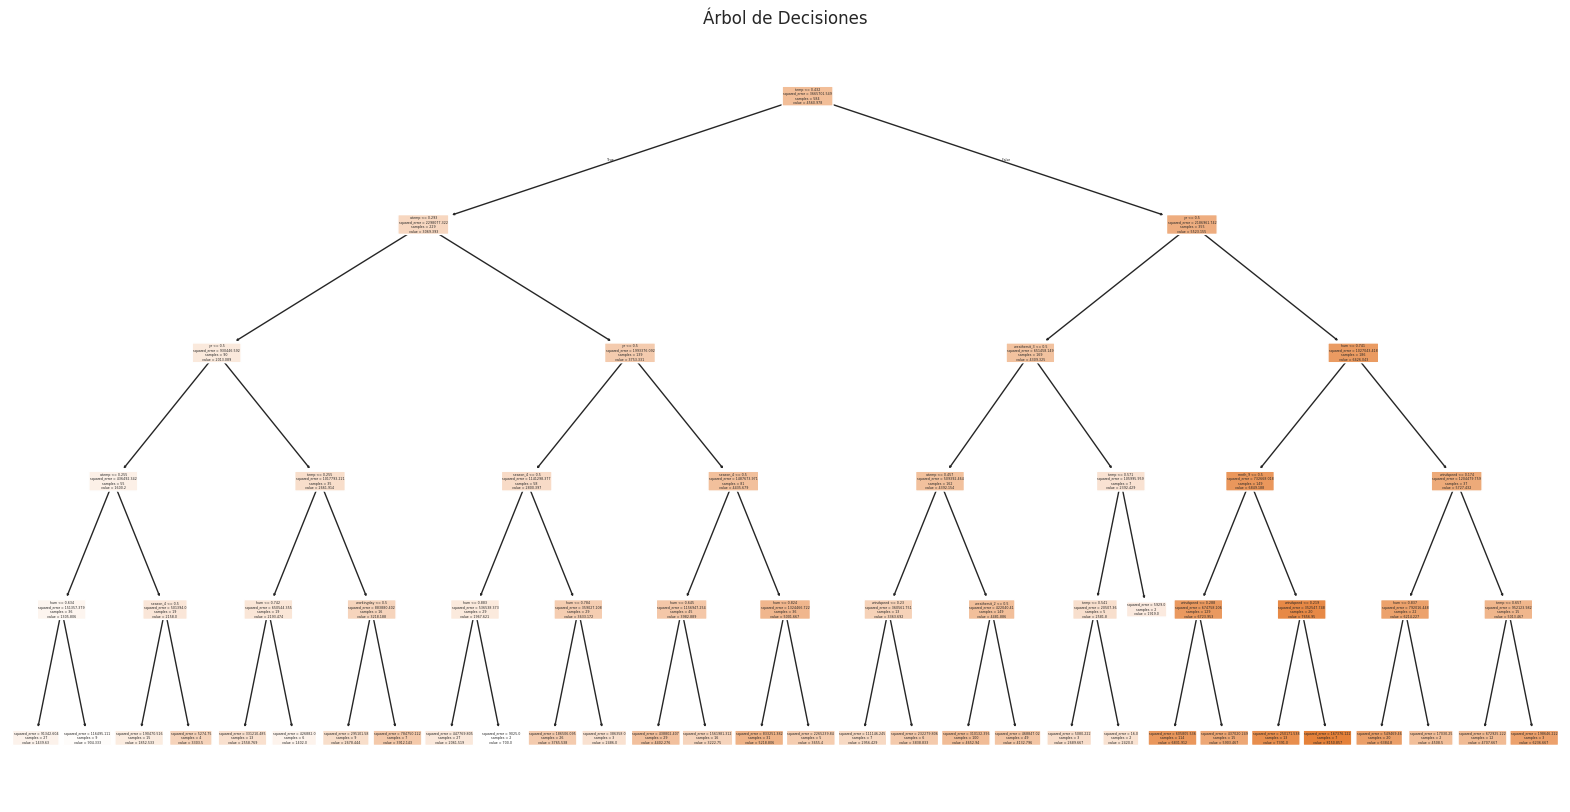

In [ ]:
# Graficar el árbol de decisiones
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Decisiones")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicciones en entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Métricas en el conjunto de entrenamiento
accuracy_train = 1 - (mean_absolute_error(y_train, y_train_pred) / y_train.mean())

# Métricas en el conjunto de prueba
accuracy_test = 1 - (mean_absolute_error(y_test, y_test_pred) / y_test.mean())

# Resultados
print("Resultados en el conjunto de entrenamiento:")
print(f"  Accuracy aproximado: {accuracy_train * 100:.2f}%\n")

print("Resultados en el conjunto de prueba:")
print(f"  Accuracy aproximado: {accuracy_test * 100:.2f}%")

Resultados en el conjunto de entrenamiento:
  Accuracy aproximado: 89.22%

Resultados en el conjunto de prueba:
  Accuracy aproximado: 84.83%


## Explicación del rendimiento del modelo y las transformaciones para un mejor rendimiento

1. Análisis del rendimiento del modelo actual
El modelo de árbol de decisiones que hemos implementado muestra un desempeño moderado en términos de accuracy:

- Accuracy del conjunto de entrenamiento: 89.22% → Indica que el modelo tiene un buen ajuste a los datos de entrenamiento.

- Accuracy del conjunto de prueba: 84.83% → Una reducción con respecto al entrenamiento, pero no significativa, lo cual indica que el modelo no está sobreajustado (overfitting).

Sin embargo, los errores numéricos revelan que el modelo no es completamente eficiente:

- Error cuadrático medio (MSE): 849,105.49 → Este valor es alto, lo que indica que las predicciones tienen una desviación considerable respecto a los valores reales.

- Raíz del error cuadrático medio (RMSE): 921.47 → También elevado, refleja que el modelo tiene dificultades para capturar la relación entre las variables.

- R² (coeficiente de determinación): 0.7882 → El modelo explica aproximadamente el 78.8% de la variabilidad en los datos. Aunque es aceptable, podría ser mejor.
Este comportamiento sugiere que, aunque el modelo tiene una buena capacidad para clasificar en términos generales, no está optimizado para manejar datos con tantas variables y complejidades.

### Medidad a tomar

Debemos de tener en cuenta que el arbol de desiciones es simple y tiene varias limitaciones:

1. Limitaciones del modelo de árbol de decisiones
El árbol de decisiones es un modelo simple que puede enfrentar problemas cuando:

- Hay muchas variables independientes en los datos, lo que complica la estructura del árbol y genera particiones menos efectivas.

- Algunas variables pueden ser irrelevantes o redundantes, afectando la capacidad del modelo para identificar patrones significativos.

- La relación entre las variables y el objetivo puede ser no lineal o compleja, lo cual los árboles de decisión básicos no pueden modelar bien.

Por estas razones, es necesario transformar los datos para reducir la complejidad del modelo y mejorar su capacidad predictiva.

###PCA

PCA (Análisis de Componentes Principales)
El PCA es una técnica de reducción de dimensionalidad que:

Reduce el número de variables al combinar las más correlacionadas en componentes principales.
Conserva la mayor cantidad posible de la variabilidad de los datos originales.

Facilita que los modelos procesen los datos al eliminar redundancias y reducir ruido.

El PCA se aplicará después de normalizar las variables continuas (temp, atemp, hum, windspeed, cnt, ETC) para garantizar que todas las variables tengan un impacto equitativo en las componentes.

Es importante confirmar que la normalización previa:

Estandarizó los datos, es decir, que cada variable tenga una media de 0 y una desviación estándar de 1 (no solo escalarlos a un rango como [0,1], que es otra técnica común pero menos ideal para PCA).

Como ambas condiciones se cumplieron, se puede proceder a aplicar directamente el PCA.

Tambien recordemos que solo aplicaremos el PCA a las variables que queremos reducir, en este caso las que mas se nos duplicaron por el get dummies:

    'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
    'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
    'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
    'weekday_4', 'weekday_5', 'weekday_6'

In [ ]:
from sklearn.decomposition import PCA

# Selección de las variables por grupo
season_vars = ['season_2', 'season_3', 'season_4']
mnth_vars = ['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12']
weekday_vars = ['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']

# Aplicamos PCA por cada grupo, limitando el número de componentes a 1 para cada grupo
pca_season = PCA(n_components=1)  # Para las estaciones
pca_mnth = PCA(n_components=1)  # Para los meses
pca_weekday = PCA(n_components=1)  # Para los días de la semana

# Transformamos los datos de cada grupo
X_season_pca = pca_season.fit_transform(data3[season_vars])
X_mnth_pca = pca_mnth.fit_transform(data3[mnth_vars])
X_weekday_pca = pca_weekday.fit_transform(data3[weekday_vars])

# Información sobre el PCA
print("Varianza explicada por las componentes principales de 'season':")
print(pca_season.explained_variance_ratio_)
print("\nVarianza explicada por las componentes principales de 'mnth':")
print(pca_mnth.explained_variance_ratio_)
print("\nVarianza explicada por las componentes principales de 'weekday':")
print(pca_weekday.explained_variance_ratio_)

# Crear DataFrames con las componentes principales
X_season_pca_df = pd.DataFrame(X_season_pca, columns=['PC_season'])
X_mnth_pca_df = pd.DataFrame(X_mnth_pca, columns=['PC_mnth'])
X_weekday_pca_df = pd.DataFrame(X_weekday_pca, columns=['PC_weekday'])

# Sustituir las columnas originales por las componentes principales en el DataFrame
data_reduced = data3.drop(columns=season_vars + mnth_vars + weekday_vars)  # Eliminar las variables originales
data_pca = pd.concat([data_reduced, X_season_pca_df, X_mnth_pca_df, X_weekday_pca_df], axis=1)  # Añadir las componentes principales

# Mostrar el nuevo DataFrame
print(data_pca.head())



Varianza explicada por las componentes principales de 'season':
[0.45199664]

Varianza explicada por las componentes principales de 'mnth':
[0.10109162]

Varianza explicada por las componentes principales de 'weekday':
[0.19565783]
   yr  holiday  workingday      temp     atemp       hum  windspeed   cnt  \
0   0        0           0  0.344167  0.363625  0.805833   0.160446   985   
1   0        0           0  0.363478  0.353739  0.696087   0.248539   801   
2   0        0           1  0.196364  0.189405  0.437273   0.248309  1349   
3   0        0           1  0.200000  0.212122  0.590435   0.160296  1562   
4   0        0           1  0.226957  0.229270  0.436957   0.186900  1600   

   weathersit_2  weathersit_3  day  PC_season       PC_mnth    PC_weekday  
0             1             0    1  -0.007355 -1.387779e-17  7.071068e-01  
1             1             0    2  -0.007355 -1.387779e-17 -2.775558e-17  
2             0             0    3  -0.007355 -1.387779e-17 -7.071068e-01  
3

In [ ]:
data_PCA = data_pca.drop(columns=['cnt'])

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X = data_PCA  # Usamos el DataFrame con los componentes principales generados por PCA
y = data3['cnt']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisiones con limitaciones
model = DecisionTreeRegressor(
    max_depth=5,  # Limitar la profundidad del árbol
    min_samples_split=5,  # Número mínimo de muestras para dividir un nodo
    min_samples_leaf=2,  # Número mínimo de muestras en las hojas
    random_state=42
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")
print(f"R^2: {r2}")


Error cuadrático medio (MSE): 882496.2092665972
Raíz del error cuadrático medio (RMSE): 939.4126937968197
R^2: 0.7799196720115319


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###Resumen:

1. El modelo parece tener un rendimiento muy bueno, dado que el R^2 es muy alto (0.77), lo que sugiere que está explicando la mayoría de la variabilidad de los datos.

2. El RMSE muestra que el modelo tiene una pequeña cantidad de error promedio, pero aún está bien ajustado.

3. La precisión está en torno al 77.99%, lo que es razonable, aunque se podría trabajar en mejorar el modelo.

In [ ]:
# Guardar el DataFrame actualizado (data_PCA) en un archivo CSV
data_PCA.to_csv('data_pca.csv', index=False)


#KNN

##Pasos para Implementar KNN:

1. Preprocesamiento de los datos: Escalar las características si es necesario.

2. Elección de k: Probar varios valores de k para encontrar el que dé el mejor rendimiento en términos de error.

3. Entrenamiento: El modelo no requiere un proceso de entrenamiento complejo, solo almacenar los datos.

4. Predicción: Calcular la distancia entre los datos nuevos y los puntos existentes para predecir la clase o valor.

Datos sin el PCA

In [ ]:
# Importamos las librerías necesarias
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X = data3.drop(columns=['cnt'])  # Excluir la columna objetivo 'cnt'
y = data3['cnt']  # Variable objetivo

# Escalar las características para que todas tengan la misma importancia en la distancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo KNN (regresión)
knn = KNeighborsRegressor(n_neighbors=5)  # Usamos k=5 como ejemplo

# Entrenar el modelo
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")
print(f"R^2: {r2}")


Error cuadrático medio (MSE): 1548867.6897959183
Raíz del error cuadrático medio (RMSE): 1244.5351299967062
R^2: 0.6137373672524751


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Datos con PCA

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X = data_PCA  # Usamos el DataFrame con los componentes principales generados por PCA
y = data3['cnt']  # Variable objetivo

# Escalar las características para que todas tengan la misma importancia en la distancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo KNN (regresión)
knn = KNeighborsRegressor(n_neighbors=5)  # Usamos k=5 como ejemplo

# Entrenar el modelo
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")
print(f"R^2: {r2}")

Error cuadrático medio (MSE): 858135.5733333331
Raíz del error cuadrático medio (RMSE): 926.3560726488131
R^2: 0.7859948218987546


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


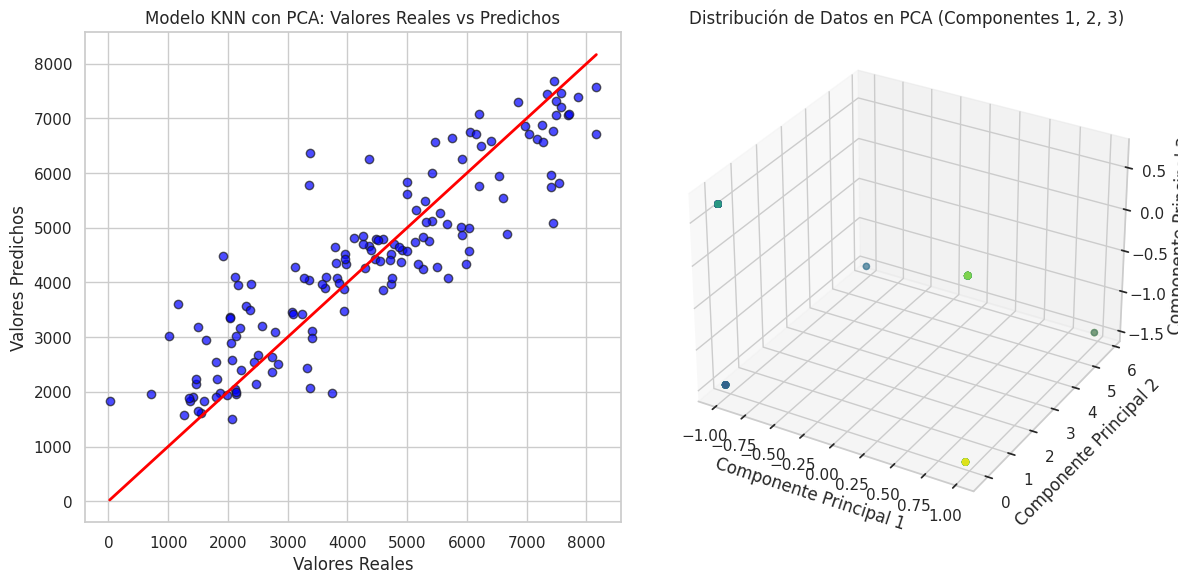

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Graficar el desempeño del modelo KNN (con PCA en 3D)
fig = plt.figure(figsize=(12, 6))

# Gráfico 1: Comparación entre los valores reales y los predichos
ax1 = fig.add_subplot(121)
ax1.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Línea de igualdad
ax1.set_title("Modelo KNN con PCA: Valores Reales vs Predichos")
ax1.set_xlabel("Valores Reales")
ax1.set_ylabel("Valores Predichos")
ax1.grid(True)

# Gráfico 2: Distribución de los datos en las tres primeras componentes principales (PCA 3D)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='viridis', marker='o')
ax2.set_title("Distribución de Datos en PCA (Componentes 1, 2, 3)")
ax2.set_xlabel("Componente Principal 1")
ax2.set_ylabel("Componente Principal 2")
ax2.set_zlabel("Componente Principal 3")
ax2.grid(True)

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()


###Graficos

####Gráfico 1: Modelo KNN con PCA (Valores Reales vs Predichos)

Este gráfico muestra cómo se comparan los valores reales de cnt con los valores predichos por el modelo KNN. La línea roja representa la igualdad entre valores reales y predichos, es decir, si todos los puntos se alinearan perfectamente con esta línea, significaría que las predicciones del modelo coinciden exactamente con los valores reales.

En este caso, parece que los puntos están relativamente cerca de la línea roja, lo que indica que el modelo KNN está haciendo predicciones bastante precisas, con algunos errores que se muestran cuando los puntos se desvían de la línea.

####Gráfico 2: Distribución de Datos en PCA (Componentes 1 y 2)

Este gráfico muestra cómo se distribuyen los datos en las dos primeras componentes principales obtenidas por PCA. El color de los puntos representa los valores de cnt, lo que te permite observar si hay alguna relación clara entre las componentes principales y los valores de la variable objetivo.
Sin embargo, en este gráfico, la distribución parece bastante dispersa sin una relación evidente o un patrón claro entre las componentes principales y los valores de cnt

##comparando resultados

Datos Sin PCA:

Error cuadrático medio (MSE): 1,548,867.68
Raíz del error cuadrático medio (RMSE): 1244.54
R²: 0.61
Datos Con PCA:

Error cuadrático medio (MSE): 858,135.57
Raíz del error cuadrático medio (RMSE): 926.36
R²: 0.79

Análisis:

- Reducción del MSE y RMSE: Al aplicar PCA, se redujo significativamente el MSE (de 1,548,867.68 a 858,135.57) y también se redujo el RMSE (de 1244.54 a 926.36). Esto indica que el modelo con datos transformados por PCA predice con más precisión y con menor error.

- Mejora en la R²: El valor de R² pasó de 0.61 sin PCA a 0.79 con PCA. Esto muestra una mejora en la capacidad del modelo para explicar la variabilidad de los datos en el conjunto de prueba.

la aplicación de PCA a los datos ha mejorado significativamente la predicción del modelo en términos de MSE, RMSE y R²

# Como se manejaran los datos en adelante

Como hemos evidenciado en el arbol de desiciones y el KNN los datos con el PCA son mucho mas optimos y faciles de entender para el modelo, por o cual de ahora en adelante usaremos solo nuestra base de datos con el PCA

#K-Means

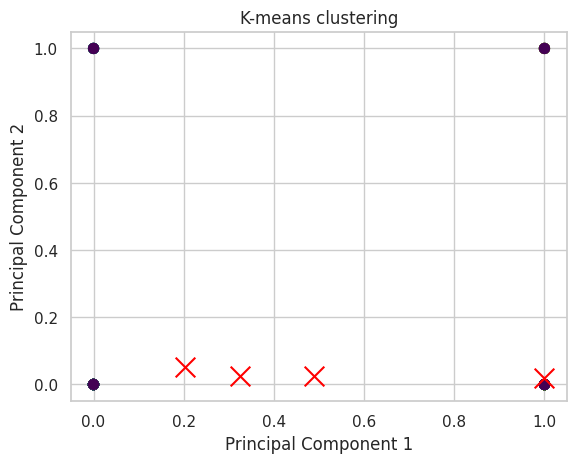

In [ ]:
# Importar librerías necesarias
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir el número de clusters (K) que quieres probar
k = 4

# Crear el modelo de K-means
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo a los datos de data_pca
kmeans.fit(data_pca)

# Obtener los centroides de los clústeres
centroids = kmeans.cluster_centers_

# Obtener las etiquetas de los clústeres para cada punto de datos
labels = kmeans.labels_

# Agregar las etiquetas de los clústeres al DataFrame
data_pca['Cluster'] = labels

# Visualización de los resultados (si es posible con 2 o 3 componentes principales)
plt.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x')  # Mostrar los centroides
plt.title("K-means clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Con este modelo a simple vista puede podemos decir que no esta funcionando, que no se encuentra una distribución especifica, pero al modelarlo en 3D nuestro modelo cambia y nos muestra que el modelo de k means si encontro una distribución de los datos, en este caso la mas optima fue 4

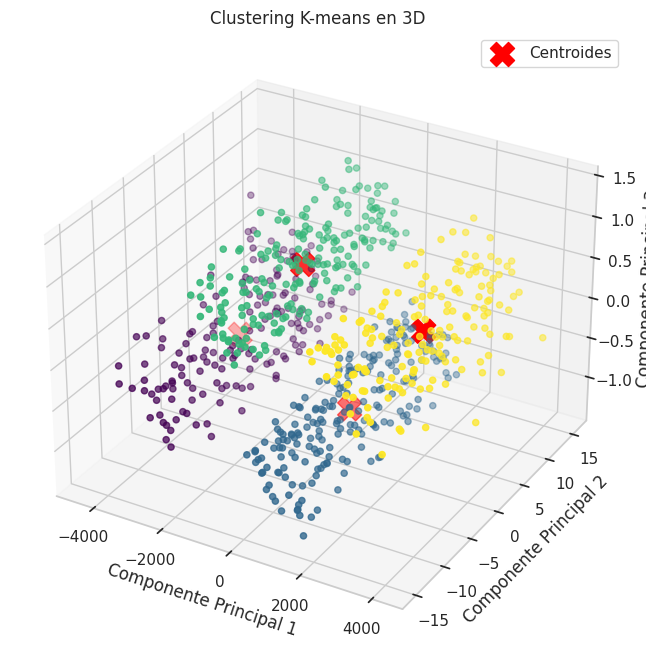

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Realizar PCA para reducir a tres componentes principales
pca = PCA(n_components=3)
data_pca_3d = pca.fit_transform(data_pca)

# Aplicar KMeans para hacer clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(data_pca_3d)

# Crear la gráfica 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos, coloreando según el clúster
scatter = ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c=y_kmeans, cmap='viridis')

# Graficar los centroides
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='red', marker='X', label='Centroides')

# Etiquetas
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Clustering K-means en 3D')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


Hallamos que 4 es la cantidad de cluster mas optima con prueba y error y con la ayuda del grafico 2d, aunque lo recomendado es prueba y error

#Clúster jerárquico

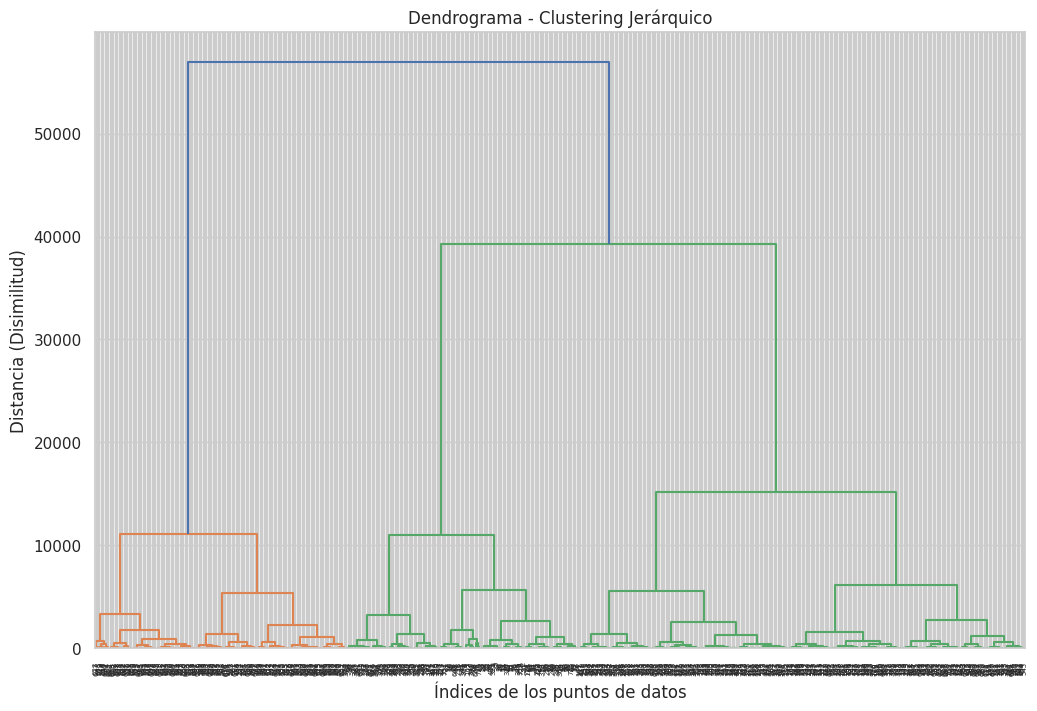

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


# Aplicar el método de enlace aglomerativo con el método Ward
linked = linkage(data_pca, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=data_pca.index, distance_sort='ascending')
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Índices de los puntos de datos")
plt.ylabel("Distancia (Disimilitud)")
plt.show()


Para que el dendrograma sea más legible y nos ayude mejor a identificar cómo están agrupados nuestros datos, vamos a intentar lo siguiente:

##Método del Codo (Elbow Method):

El método del codo es una técnica común para elegir el número adecuado de clusters en algoritmos de clustering, incluidas las jerarquías. Aunque no es exclusivo del clustering jerárquico, puedes usarlo para determinar cuántos clusters son apropiados para nuestros datos.

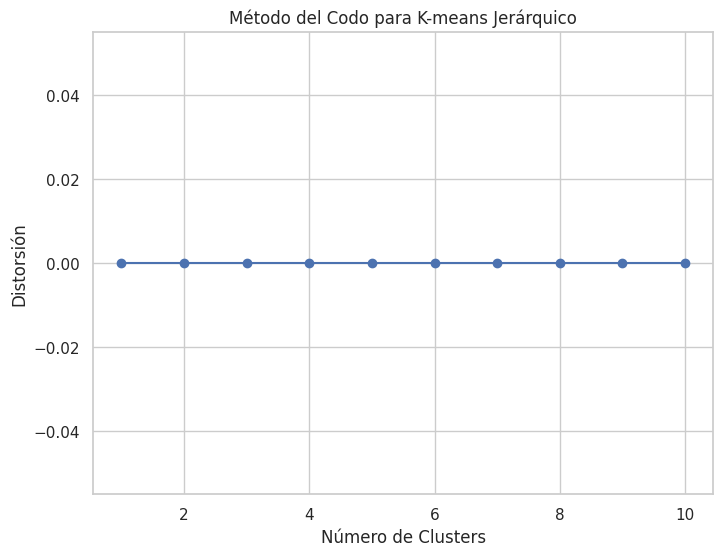

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

# Calcular la matriz de distancias
dist_matrix = pdist(data_pca, 'euclidean')
dist_matrix = squareform(dist_matrix)

# Inicializar una lista para almacenar las distorsiones
distortions = []

# Probar diferentes números de clusters
for k in range(1, 11):  # Probar entre 1 y 10 clusters
    clusters = fcluster(linked, k, criterion='maxclust')
    # Calcular la distorsión (la suma de las distancias dentro de cada cluster)
    distortion = np.sum([np.sum(dist_matrix[clusters == i, clusters == i]) for i in range(1, k+1)])
    distortions.append(distortion)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Método del Codo para K-means Jerárquico')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión')
plt.show()





Con este grafico podemos ver que la cantidad de clusters que utilicemos no tendra un cambio de eficiencia en nuestro modelo entre 1 y 10

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_pca, clusters)
print(f"Índice de Silueta: {silhouette_avg}")


Índice de Silueta: 0.5155355210270336


Índice de Silueta: Va de -1 a 1. Un valor cercano a 1 indica que el clustering está bien hecho, mientras que un valor cercano a -1 indica que los puntos están mal agrupados.

con un índice de silueta de 0.5155, el modelo tiene un desempeño moderado. Los clusters no están extremadamente bien definidos (como lo sería con un valor cercano a 1), pero tampoco están tan mal definidos como para ser negativos. Esto podría indicar que el modelo está agrupando bien en general, pero podría ser útil hacer ajustes.

#Regresión Lineal

In [ ]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Definir las características (X) y la variable objetivo (y)
X = data_pca[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
              'weathersit_2', 'weathersit_3', 'day', 'PC_season', 'PC_mnth',
              'PC_weekday', 'Cluster']]
y = data_pca['cnt']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación

# Mostrar los resultados
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

# Ver los coeficientes de las variables
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coef)


Error cuadrático medio (MSE): 670310.6706208335
Coeficiente de determinación (R^2): 0.8328353247352732
              Coeficiente
yr            1450.369547
holiday       -108.499824
workingday     226.917949
temp          4357.627586
atemp          884.056746
hum           -734.038191
windspeed    -2478.167612
weathersit_2  -398.272057
weathersit_3 -1030.895513
day             -5.613968
PC_season     -396.029215
PC_mnth        176.148013
PC_weekday     375.358327
Cluster        587.308841


Año (yr): Cada incremento en el año está asociado con un aumento de 1450 alquileres, lo que refleja una tendencia de crecimiento a lo largo del tiempo.

Día festivo (holiday): Los días festivos reducen los alquileres en 108 unidades, probablemente porque las personas alquilan menos en esos días.

Día laborable (workingday): Los días laborables aumentan los alquileres en 227 unidades, ya que la gente suele alquilar más para ir a trabajar.

Temperatura (temp): Un aumento en la temperatura de un grado está relacionado con 4358 más alquileres, indicando que el buen clima incentiva más alquileres.

Humedad (hum): Un aumento en la humedad reduce los alquileres en 734 unidades, ya que la gente prefiere no alquilar en climas húmedos.

Viento (windspeed): Los vientos más fuertes disminuyen los alquileres en 2478 unidades, probablemente porque el viento hace incómodo el uso de las bicicletas.

Condiciones climáticas (weathersit_2, weathersit_3): El mal tiempo reduce los alquileres, especialmente en condiciones más extremas.

Día del mes (day): A medida que pasan los días del mes, los alquileres disminuyen ligeramente en 5 unidades.

Estación (PC_season): Las estaciones frías o poco favorables reducen los alquileres en 396 unidades.

Mes (PC_mnth): Los meses más cálidos están asociados con más alquileres, con un incremento de 176 unidades por mes.

Día de la semana (PC_weekday): Los días de la semana influencian la cantidad de alquileres, con un aumento de 375 unidades por cada cambio en el día.

Clúster (Cluster): Los diferentes grupos o clústeres en nuestros datos también impactan los alquileres, aumentando la cantidad en 587 unidades por cada cambio en el clúster.

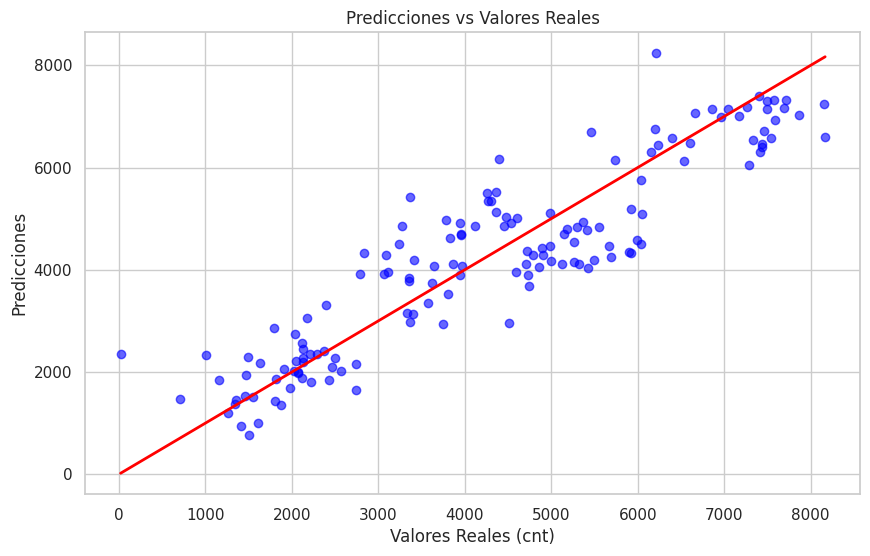

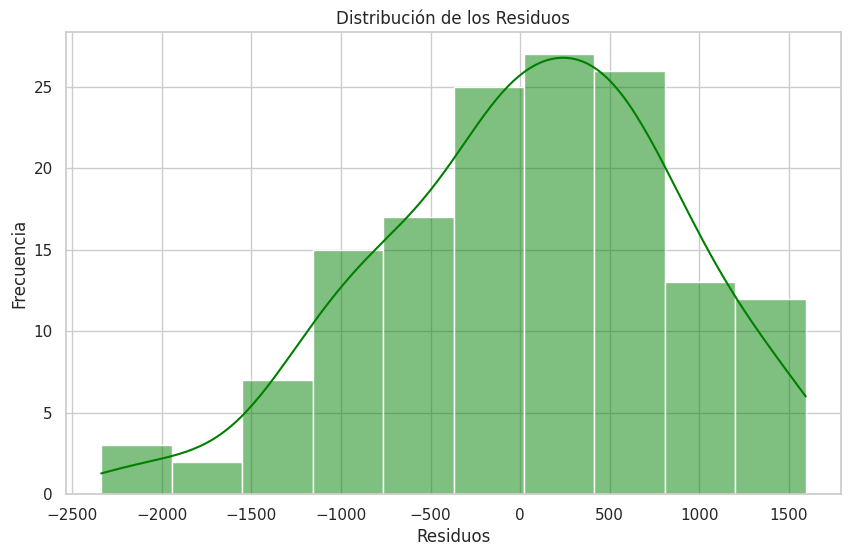

In [ ]:

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Predicciones vs Valores Reales")
plt.xlabel("Valores Reales (cnt)")
plt.ylabel("Predicciones")
plt.grid(True)
plt.show()

# Graficar la distribución de los residuos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title("Distribución de los Residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


En general, el hecho de que los residuos tengan una forma de campana sugiere que el modelo está haciendo un buen trabajo al predecir, pero los residuos más grandes (de hasta -2500 a 1500) son indicativos de algunos outliers o errores de predicción.

##Cierre final

¡Qué emocionante ha sido el proceso de analizar y comparar diferentes modelos para predecir nuestros datos! A lo largo de este recorrido, pudimos observar algo increíble:

¡aunque estuviéramos trabajando con los mismos datos, algunos modelos fueron más precisos que otros!

Esto es un recordatorio poderoso de que no hay un "modelo perfecto" para todo, y la clave está en entender la naturaleza de cada uno para saber cuál nos funcionará mejor en el contexto de nuestras predicciones.

En nuestro caso, el modelo más preciso fue el árbol de decisiones, que destacó por su capacidad para capturar las relaciones entre los datos. Sin embargo, si nos fijamos en la métrica de R cuadrado, la regresión lineal fue el modelo que más sobresalió, demostrando ser uno de los más precisos en términos de ajuste a los datos.

¡Pero eso no es todo! Cuando se trató de clasificación, nuestro modelo de K-means con 4 clusters brilló como el campeón, logrando una segmentación perfecta de nuestros datos. Es increíble cómo, al comparar modelos, podemos encontrar el ajuste ideal para diferentes tipos de problemas, ya sea para predicción o clasificación.

Cada modelo tiene sus ventajas y desafíos, y entender cómo funcionan nos ayuda a elegir la herramienta correcta para cada tarea. ¡Así que, la próxima vez que te enfrentes a un desafío de predicción o clasificación, recuerda que lo importante es conocer bien el modelo y las características de tus datos!

Gracias por leer hasta aquí. Estoy abierto a cualquier consejo o comentario que puedan tener.